In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle_zillow import wrangle_zillow as wz 

from scipy import stats
alpha = 0.5

1 Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
df = wz()
df.sample()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
12066,12066,11007891,3.0,4.0,1692.0,6037.0,34324127.0,-118407459.0,12154.0,6.037106e+07,...,0.0,1973.0,130847.0,348926.0,2016.0,218079.0,4454.89,0.919024,2017-02-24,Los_Angeles


In [3]:
df.logerror.head()

0    0.025595
1    0.055619
2    0.005383
3   -0.103410
4    0.006940
Name: logerror, dtype: float64

In [4]:
df.shape

(69729, 23)

In [5]:
df.isna().sum()

Unnamed: 0                      0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
county                          0
dtype: int64

1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.

2. Is logerror significantly different for homes older than 33 years?

3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

4. Is log error significantly differenmt for homes with more than 4 rooms?

In [6]:
# Split data 
 # split the data in train, validate and test
train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [7]:
train.shape, test.shape, validate.shape

((41837, 23), (13946, 23), (13946, 23))

## 1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.ual



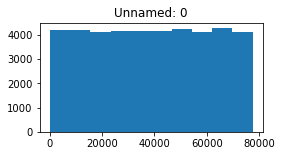

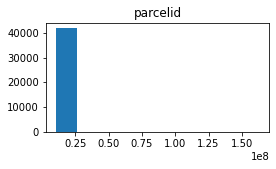

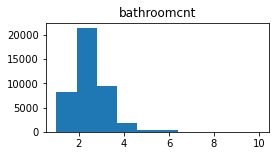

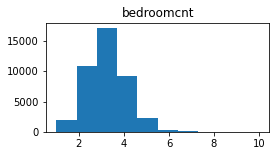

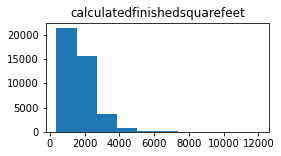

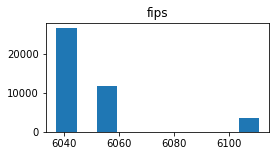

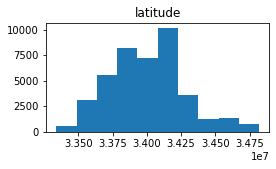

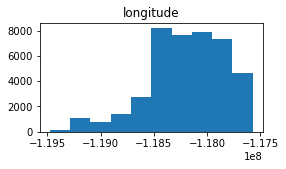

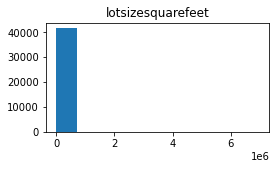

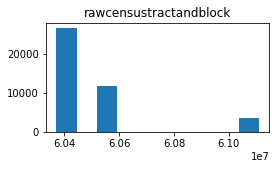

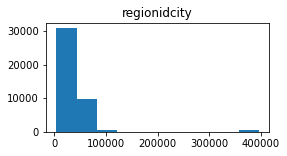

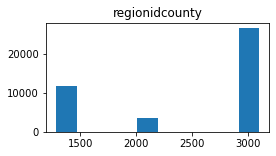

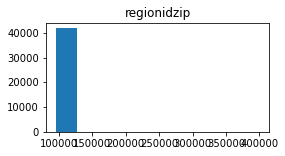

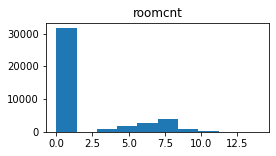

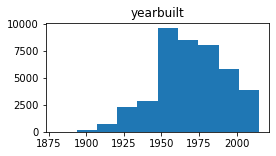

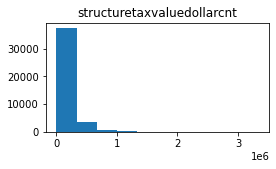

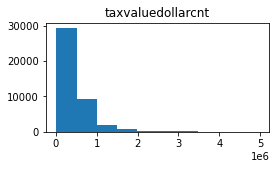

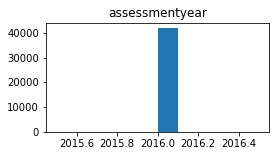

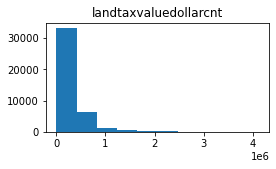

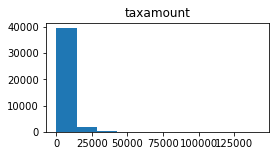

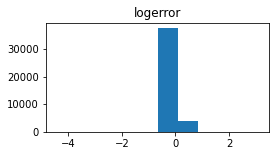

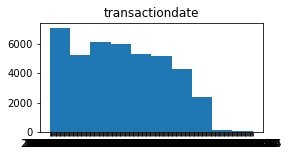

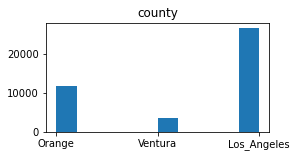

In [8]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

- Data is close to normally distributed
- Los Angeles county has more data points than the other 2 counties convined 

## 2. Is logerror significantly different for homes older than 33 years?

$H_0$: Means of the logerror for older houses than 33 == to newer.

$H_a$: Means of the logerror for older houses != newer houses.

In [9]:
print(train[train.yearbuilt < 1989].logerror.var())
print(train[train.yearbuilt >= 1898].logerror.var())

0.028437894704731844
0.026424740581395666


In [10]:
f, p = stats.ttest_ind(train[train.yearbuilt < 1989].logerror, \
                       train[train.yearbuilt >= 1898].logerror, equal_var=False)


In [11]:
if p < alpha:
    print("We reject that Means of the logerror for older houses than 33")
else:
    print("We fail to reject Means of the logerror for older houses than 33")

We fail to reject Means of the logerror for older houses than 33


## 3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County? 

$H_0$: Means of the logerror for the counties are all equal.

$H_a$: Means of the logerror for the counties are NOT all equal.

In [12]:
f, p = stats.f_oneway(train[train.county == 'Los_Angeles'].logerror, train[train.county == 'Orange'].logerror, train[train.county == 'Ventura'].logerror)


In [13]:
if p < alpha:
    print("We reject $H_0$")
else:
    print("We fail to reject $H_0$")

We reject $H_0$


# 4. Is log error significantly differenmt for homes with more than 4 rooms? 
$H_0$: Means of the logerror for houses with rooms < 4.

$H_a$: Means of the logerror for houses with rooms >= 4.

In [16]:
print(train[train.bedroomcnt < 4].logerror.var())
print(train[train.bedroomcnt >= 4].logerror.var())

0.025685210892059118
0.028829737421259088


In [17]:
f, p = stats.ttest_ind(train[train.bedroomcnt < 4].logerror, \
                       train[train.bedroomcnt >= 4].logerror, equal_var=False)


In [19]:
if p < alpha:
    print("We reject $H_0$")
else:
    print("We fail to reject $H_0$")

We reject $H_0$
